<div align="right">
  <img src="https://drive.google.com/uc?export=view&id=1J8JpP65HsHXdpJvhb_sMwn3yROyU832m" height="80" width="200" style="float: right;">
</div>
<h1><b>Data Science and Machine Learning</b></h1>
<h2><b>Clase 27</b>: Introducción aprendizaje profundo (Deep learning)</h2>
<h3><b>Docente</b>: <a href="https://www.linkedin.com/in/danielablanco/">Daniela Blanco</a>

# Contenido

- [1. ¿Aprendizaje profundo?](#deeplearning)
- [2. Redes neuronales](#redes)
  - [2.1. Arquitectura](#arquitectura)
  - [2.2. Función de activación](#activacion)
  - [2.3. Función de pérdida](#perdida)
  - [2.4. Optimizador](#optimizador)
  - [2.5. Funcionamiento](#funcionamiento)
- [3. Descenso del gradiente](#descenso)
  - [3.1. Implementaciones](#implementaciones)
- [4. Tipos de redes neuronales](#tipos)
- [5. Librerías](#librerias)
- [6. Ejemplos de uso](#ejemplos)
- [7. Links de interés](#links)


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.datasets import mnist

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from google.colab import drive

import warnings

In [ ]:
warnings.filterwarnings("ignore")

## 1. ¿Aprendizaje profundo? <a name="deeplearning"></a>

<img src="https://drive.google.com/uc?export=view&id=15CjovalU2EC2CTS4vsf03UWOjKow32S_" height="180" width="370" style="float: center;">

Es una subdisciplina del machine learning que se enfoca en el uso de redes neuronales profundas.

Estas redes neuronales se denominan "profundas" porque tienen muchas capas de neuronas artificiales, o "nodos", que pueden aprender y representar patrones de datos muy complejos.

A diferencia de los algoritmos tradicionales de machine learning, que a menudo requieren de un proceso de ingeniería de características manual, los modelos de deep learning pueden aprender representaciones de alto nivel directamente de los datos brutos.

Las técnicas de deep learning han impulsado muchos avances en la IA en la última década, particularmente en áreas como el reconocimiento de voz, el reconocimiento de imágenes, el procesamiento del lenguaje natural o la traducción automática.

A pesar de su complejidad y requerimientos de recursos, el deep learning ha demostrado ser una herramienta extremadamente poderosa para resolver problemas de IA complejos y se espera que siga impulsando muchos avances en la IA en el futuro.

## 2. Redes neuronales <a name="redes"></a>

Una Red de Neuronas Artificiales (ANN, Artificial Neural Networks) es un modelo de aprendizaje automático inspirado en la estructura y función del cerebro humano.

Para implementar una red neuronal debemos definir su arquitectura, funciones de activación y perdida y un optimizador apropiado según la tarea a realizar.

### 2.1.Arquitectura <a name="arquitectura"></a>

<img src="https://drive.google.com/uc?export=view&id=1IyHPuf1KGfJoH-gmhgv7t2kcdvZTj9vG" height="230" width="380" style="float: center;">

Consta de un gran número de unidades de procesamiento llamadas **neuronas** (o nodos) interconectadas.

Cada neurona recibe una serie de entradas, las procesa y produce una salida.

Las neuronas están organizadas en **capas** (layers). Una capa de **entrada** que recibe los datos, una o más capas **ocultas** que procesan los datos, y una capa de **salida** que produce la predicción o clasificación final.

Las capas ocultas procesan las entradas recibidas de la capa anterior y pasa el resultado a la siguiente capa. Una red puede tener múltiples capas ocultas.

La **profundidad** (depth) de una red será la cantidad de capas.

Cada conexión entre neuronas tiene un **peso** (weights) asociado.

Además cada neurona tiene un valor de **sesgo** (bias) que permite ajustar la salida independientemente de las entradas. Esto ayuda a la red a ajustarse mejor a los datos.

Durante el entrenamiento, los pesos se ajustan para minimizar el error de predicción.

<img src="https://drive.google.com/uc?export=view&id=1hQsHQobVn_BzsHTMw3KwnpeZ_tI7tm8n" height="222" width="546" style="float: center;">

### 2.2. Función de activación <a name="activacion"></a>

La función de activación introduce la no linealidad en el modelo.

Esto permite que la red neuronal modele relaciones complejas entre las entradas y las salidas, más allá de lo que podría hacer con solo combinaciones lineales de las entradas.

Ejemplos comunes de funciones de activación incluyen la función sigmoide, la función tangente hiperbólica y la unidad lineal rectificada (ReLU).

<img src="https://drive.google.com/uc?export=view&id=1pC3jqDkmzLdM4rBbcAvcTpXDxgInhzdG" height="205" width="506" style="float: center;">

### 2.3. Función de pérdida (loss) <a name="perdida"></a>

Mide la diferencia entre la salida predicha por la red y el valor real.

Nos dice que tan buena es la red neuronal.

Un resultado alto indica que no está aprendiendo bien y uno bajo que va mejorando.

Algunas funciones de pérdida comunes son:

Ejemplos:
- binary cross entropy (clasificación binaria),
- categorical cross entropy (clasificación multiclase),
- MSE (regresión), etc.

### 2.4. Optimizador <a name="optimizador"></a>

Determina la forma del aprendizaje. El proceso de ajuste de los pesos de la red para minimizar la función de pérdida.

Actualiza los parámetros de la red valiéndose de la iteración previa.

Ejemplos:
- Stochactic gradient descent,
- Root Mean Square Propagation,
- AdaGrad, etc.


### 2.5. Funcionamiento <a name="funcionamiento"></a>

Cada neurona recibe una serie de entradas x1​ ,x2​ ,…,xn​ que pueden provenir de los datos de entrada iniciales o de las salidas de otras neuronas en capas anteriores.

A cada entrada se le asigna un peso 𝑤1,𝑤2,…,𝑤𝑛.

Además de las entradas ponderadas, cada neurona tiene un valor de sesgo b.

La neurona calcula una suma ponderada de las entradas y el sesgo:

  **𝑧 = 𝑤1𝑥1 + 𝑤2𝑥2 +…+ 𝑤𝑛𝑥𝑛 + 𝑏**

La suma ponderada 𝑧 se pasa a través de una función de activación.

La salida de la función de activación se convierte en la salida final de la neurona:

  **𝑦 = activacion(𝑧)**

La salida 𝑦 de la neurona se puede enviar como entrada a otras neuronas en capas posteriores o puede ser la salida final de la red si la neurona está en la capa de salida.

<img src="https://drive.google.com/uc?export=view&id=1puaqTfK3T9XJIWvaZSJbsQP50_8BGmf3" height="300" width="400" style="float: center;">

La red mapea datos de entrada con predicciones.

La función de pérdida compara las predicciones con los target reales y da un valor de pérdida. Una métrica de cuán buena es la red.

Se buscará minimizar la función de perdida en cada iteración.

El optimizador usa los valores de pérdida para actualizar pesos.

Una **época** (epoch) es una pasada completa por todo el conjunto de datos de entrenamiento. A menudo, se necesita entrenar la red durante muchas épocas para obtener buenos resultados.


## 3. Descenso del gradiente <a name="descenso"></a>

El algoritmo de optimización más utilizado para entrenar redes neuronales es el descenso del gradiente para minimizar una función de coste o pérdida.

El gradiente es un cálculo que nos permite saber cómo ajustar los parámetros de la red de tal forma que se minimice su desviación a la salida.

**Backpropagation** es el proceso de ajuste de los pesos mediante el cálculo del error de predicción y la propagación de este error hacia atrás a través de la red.

**Tasa de aprendizaj**e (Learning Rate): Es un hiperparámetro que controla cuánto se ajustan los pesos de la red en cada iteración del entrenamiento. Un valor adecuado de la tasa de aprendizaje es crucial para el rendimiento de la red.

Comienza con valores iniciales aleatorios para los parámetros y luego, en cada iteración, calcula el gradiente de la función de coste con respecto a cada parámetro. El gradiente en un punto es un vector que apunta en la dirección de la mayor pendiente en ese punto, por lo que moverse en la dirección opuesta (es decir, el "descenso de gradiente") reduce la función de coste.

Este proceso se repite hasta que el algoritmo converge a un mínimo de la función de coste, es decir, un punto donde la función de coste no puede ser reducida más moviendo los parámetros en ninguna dirección.

El algoritmo cuenta con varias versiones dependiendo del número de muestras que introducimos a la red en cada iteración.


### 3.1. Implementaciones <a name="implementaciones"></a>


- Por lotes (o batch): todos los datos disponibles se introducen de una vez.

  Esto supondrá problemas de estancamiento, ya que el gradiente se calculará usando siempre todas las muestras, y llegará un momento en que las variaciones serán mínimas

- Estocástico: se introduce una única muestra aleatoria en cada iteración.

  El gradiente se calculará para esa muestra concreta, lo que supone la introducción de la deseada aleatoriedad, dificultando así el estancamiento. Contra: lentitud, ya que necesita de muchas más iteraciones.

- Descenso del gradiente (estocástico) en mini-lotes (o mini-batch): se introducen N muestras en cada iteración.

  Conservando las ventajas de la segunda versión y consiguiendo además que el entrenamiento sea más rápido debido a la paralelización de las operaciones.


## 4. Tipos de redes neuronales <a name="tipos"></a>

| Modelo                                        | Descripción                                                                                                                     | Uso típico                                                     |
|-----------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------|
| Totalmente Conectadas (FCNN) | Todas las neuronas de una capa conectadas a todas las neuronas de la capa siguiente.         | Clasificación, regresión                                       |
| Convolucionales (CNN)        | Para procesar datos con una estructura de cuadrícula topológica, como una imagen.                               | Procesamiento y clasificación de imágenes                      |
| Recurrentes (RNN)            | Para procesar secuencias de datos, teniendo en cuenta el orden de los datos.                                    | Procesamiento del lenguaje natural, series temporales          |
| Autoencoders                                  | Modelo que aprende a copiar sus entradas a sus salidas. Se utiliza para aprender la representación de los datos.                | Reducción de la dimensionalidad, generación de nuevas imágenes |
| Redes Generativas Adversativas (GAN)          | Sistema de dos redes neuronales que compiten entre sí: una red genera nuevos datos y la otra evalúa su autenticidad.            | Generación de nuevas imágenes, superresolución                 |
| Transformers                                  | Modelo basado en la atención que procesa los datos de entrada en paralelo en lugar de secuencialmente, mejorando la eficiencia. | Procesamiento del lenguaje natural (por ejemplo, BERT, GPT)    |

## 5. Librerías <a name="librerias"></a>

Los modelos de aprendizaje profundo se pueden implementar utilizando diversas bibliotecas y marcos de trabajo. Algunas de las más populares son `TensorFlow` y `Keras`.

- TensorFlow: Es una biblioteca de código abierto para el aprendizaje automático desarrollada por Google. Proporciona un conjunto de herramientas para desarrollar y entrenar modelos de Machine Learning y Deep Learning.

  Soporta una amplia gama de algoritmos y técnicas. Además, puede ser ejecutado en múltiples CPUs y GPUs.

- Keras: Es una API de redes neuronales de alto nivel, escrita en Python y capaz de correr sobre TensorFlow, CNTK, o Theano. Fue desarrollada con el objetivo de permitir una experimentación rápida y ser amigable, modular y extensible

Además de TensorFlow y Keras, existen otras bibliotecas y marcos de trabajo como PyTorch, Caffe, MXNet, etc., que también son muy populares para la implementación de modelos de deep learning.

## 6. Ejemplos de uso <a name="ejemplos"></a>

### Ejemplo 1: Pasar grados de Celsius a Fahrenheit

In [ ]:
# datos
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

**Modelo simple**

In [ ]:
# una capa de entrada con una sola neurona (input_shape)
# una capa de salida con una neurona
# sin capas ocultas
capa = tf.keras.layers.Dense(units=1, input_shape=[1])

modelo = tf.keras.Sequential([capa])

In [ ]:
# configuracion del modelo
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss = 'mean_squared_error'
)

In [ ]:
# entrenamiento
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=True)

Visualizamos las perdidas

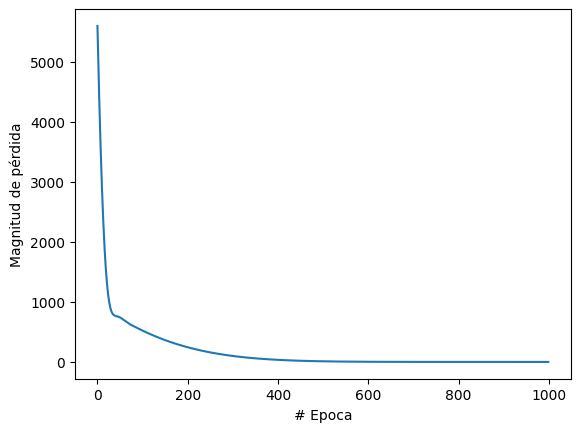

In [6]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

#### Hacemos la predicción

In [7]:
resultado = modelo.predict([100.0])

print("El resultado es " + str(resultado) + " fahrenheit!")

1/1 [==============================] - 0s 102ms/step
El resultado es [[211.7417]] fahrenheit!


### Parámetros del modelo

In [8]:
print(capa.get_weights())

[array([[1.7983065]], dtype=float32), array([31.911062], dtype=float32)]


**¿Cuál era la fórmula matemática para realizar la conversión?**

Fahrenheit = Celsius * 1.8 + 32

**Modelo más complejo**

In [9]:
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)

modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [10]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [11]:
historial = modelo.fit(celsius, fahrenheit, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 1s 895ms/step - loss: 2676.7446
Epoch 2/1000
1/1 [==============================] - 0s 10ms/step - loss: 1393.0251
Epoch 3/1000
1/1 [==============================] - 0s 9ms/step - loss: 898.3265
Epoch 4/1000
1/1 [==============================] - 0s 12ms/step - loss: 1280.6777
Epoch 5/1000
1/1 [==============================] - 0s 9ms/step - loss: 1300.4397
Epoch 6/1000
1/1 [==============================] - 0s 11ms/step - loss: 990.1596
Epoch 7/1000
1/1 [==============================] - 0s 9ms/step - loss: 776.9093
Epoch 8/1000
1/1 [==============================] - 0s 11ms/step - loss: 766.9136
Epoch 9/1000
1/1 [==============================] - 0s 11ms/step - loss: 850.1667
Epoch 10/1000
1/1 [==============================] - 0s 11ms/step - loss: 894.8336
Epoch 11/1000
1/1 [==============================] - 0s 10ms/step - loss: 851.9434
Epoch 12/1000
1/1 [==============================] - 0s 8ms/step - loss: 744.0801
Epoch 13/100

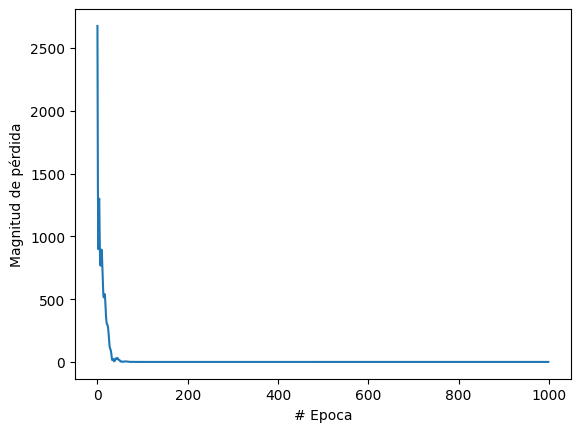

In [12]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [13]:
resultado = modelo.predict([100.0])

print("El resultado es " + str(resultado) + " fahrenheit!")

1/1 [==============================] - 0s 79ms/step
El resultado es [[211.74742]] fahrenheit!


In [14]:
print("Variables internas del modelo")

print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[ 0.73367506,  0.03891382, -0.15171172]], dtype=float32), array([ 3.5723503 , -3.3380754 ,  0.29076993], dtype=float32)]
[array([[ 0.3894577 , -1.2030257 , -0.9263961 ],
       [ 0.3806248 ,  0.881087  ,  0.9511756 ],
       [ 0.34079993,  0.53006446, -1.1308819 ]], dtype=float32), array([-2.9749277, -3.398304 , -3.4059384], dtype=float32)]
[array([[-0.61096543],
       [-1.5895686 ],
       [-1.0054418 ]], dtype=float32), array([3.3310134], dtype=float32)]


### Ejemplo 2: Diabetes

Vamos a utilizar el conjunto de datos de inicio de diabetes de los indios Pima.

Describe los datos de los registros médicos de los pacientes de los indios Pima y si tuvieron un inicio de diabetes dentro de los cinco años.

In [15]:
# conexion drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
archivo = '/content/drive/MyDrive/4Geeks/cursadas/ds_pt_8/data/clean-pima-indians-diabetes.csv'
total_data  = pd.read_csv(archivo)

In [17]:
X = total_data.drop("8", axis = 1)
y = total_data["8"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,0,1,2,3,4,5,6,7
60,-0.547919,-1.154694,-3.572597,-1.288212,-0.692891,-4.060474,-0.507006,-1.041549
618,1.530847,-0.278373,0.666618,0.217261,-0.692891,-0.481351,2.446670,1.425995
346,-0.844885,0.566649,-1.194501,-0.096379,0.027790,-0.417892,0.550035,-0.956462
294,-1.141852,1.255187,-0.987710,-1.288212,-0.692891,-1.280942,-0.658012,2.702312
231,0.639947,0.410164,0.563223,1.032726,2.519781,1.803195,-0.706334,1.085644


In [18]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: 8, Length: 768, dtype: int64

Los modelos en Keras se definen como una secuencia de capas. Creamos un modelo secuencial y agregamos capas una a una hasta que estemos satisfechos con nuestra arquitectura de red.

La capa de entrada siempre tendrá tantas neuronas como variables predictoras. En este caso, tenemos un total de 8 (de la 0 a la 7).

A continuación, añadimos dos capas ocultas, una de 12 neuronas y otra de 8.

Por último, la cuarta capa, de salida, tendrá una única neurona, ya que el problema es dicotómico. Si fuese de n clases, la red tendría n salidas.

In [19]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(12, input_shape = (8,), activation = "relu"))
model.add(tf.keras.layers.Dense(8, activation = "relu"))
model.add(tf.keras.layers.Dense(1, activation = "sigmoid"))

Al compilar, debemos especificar algunas propiedades adicionales requeridas al entrenar la red.

In [20]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model

In [23]:
X_train.shape

(614, 8)

Definiremos el optimizador conocido como adam. Esta es una versión popular del descenso de gradiente porque se sintoniza automáticamente y brinda buenos resultados en una amplia gama de problemas. Recopilaremos e informaremos la precisión de la clasificación, definida a través del argumento de las métricas.

El entrenamiento ocurre en épocas (epoch) y cada época se divide en lotes (batch).

Epoch: Una pasada por todas las filas del conjunto de datos de entrenamiento.
Batch: Una o más muestras consideradas por el modelo dentro de una época antes de que se actualicen los pesos.

El proceso de entrenamiento se ejecutará durante un número fijo de iteraciones, que son las épocas. También debemos establecer la cantidad de filas del conjunto de datos que se consideran antes de que se actualicen los pesos del modelo dentro de cada época, lo que se denomina tamaño de batch y se establece mediante el argumento batch_size (tamaño_lote).

Para este problema, ejecutaremos una pequeña cantidad de epochs (150) y usaremos un tamaño de batch relativamente pequeño de 10:

In [24]:
model.fit(X_train, y_train, epochs = 150, batch_size = 10)

Epoch 1/150
62/62 [==============================] - 1s 2ms/step - loss: 0.7290 - accuracy: 0.5049
Epoch 2/150
62/62 [==============================] - 0s 2ms/step - loss: 0.6669 - accuracy: 0.6270
Epoch 3/150
62/62 [==============================] - 0s 2ms/step - loss: 0.6087 - accuracy: 0.6808
Epoch 4/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5568 - accuracy: 0.7182
Epoch 5/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5228 - accuracy: 0.7296
Epoch 6/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5015 - accuracy: 0.7410
Epoch 7/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4892 - accuracy: 0.7508
Epoch 8/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4791 - accuracy: 0.7687
Epoch 9/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4705 - accuracy: 0.7769
Epoch 10/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4638 - accuracy: 0.7834
Epoch 11/

In [25]:
_, accuracy = model.evaluate(X_train, y_train)

print(f"Accuracy: {accuracy}")

20/20 [==============================] - 0s 2ms/step - loss: 0.3427 - accuracy: 0.8388
Accuracy: 0.8387622237205505


El accuracy del conjunto de entrenamiento es de un 86,15%.

In [26]:
y_pred = model.predict(X_test)
y_pred[:15]

5/5 [==============================] - 0s 2ms/step


array([[0.3158147 ],
       [0.0445143 ],
       [0.05449964],
       [0.22216803],
       [0.351036  ],
       [0.28264105],
       [0.00152145],
       [0.71034014],
       [0.7688697 ],
       [0.54263777],
       [0.04980477],
       [0.5990942 ],
       [0.41251   ],
       [0.56798035],
       [0.02570826]], dtype=float32)

Como vemos, el modelo no devuelve las clases 0 y 1 directamente, sino que requiere de un preprocesamiento previo:

In [27]:
y_pred_round = [round(x[0]) for x in y_pred]
y_pred_round[:15]

[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0]

In [28]:
accuracy_score(y_test, y_pred_round)

0.7532467532467533

### Ejemplo 3: Clasificar imágenes

MNIST es un conjunto de datos de imágenes de dígitos escritos a mano, desde 0 hasta 9.

In [29]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


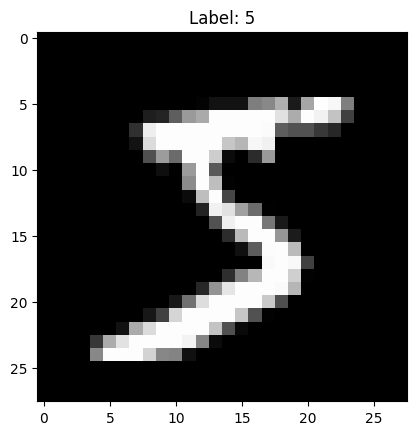

In [30]:
# Seleccionar una imagen en particular, por ejemplo, la imagen con índice 0
image_index = 0
image = X_train[image_index]
label = y_train[image_index]

# Mostrar la imagen
plt.imshow(image, cmap='gray')
plt.title(f'Label: {label}')
plt.show()

Los valores de los píxeles de las imágenes se normalizan para que estén en el rango de 0 a 1 en lugar de 0 a 255.

In [31]:
# Normalizar los datos (transformamos los valores de los píxeles de 0-255 a 0-1)
X_train, X_test = X_train / 255.0, X_test / 255.0

Se define la arquitectura de la red neuronal. En este caso, estamos utilizando un modelo secuencial simple con una capa de aplanamiento que transforma las imágenes 2D en vectores 1D, una capa densa con 128 neuronas y una capa de salida con 10 neuronas.

In [32]:
model = tf.keras.Sequential([
  # Capa que aplana la imagen de entrada de 28x28 píxeles a un vector de 784 elementos
  tf.keras.layers.Flatten(input_shape = (28, 28)),
  # Capa oculta densa con 128 neuronas y función de activación ReLU
  tf.keras.layers.Dense(128, activation = "relu"),
  # Capa de salida con 10 neuronas (una para cada dígito del 0 al 9)
  tf.keras.layers.Dense(10, activation='softmax')
])

También añadimos el compilador de la red para definir el optimizador y la función de pérdida, como hicimos anteriormente:

In [33]:
model.compile(optimizer = "adam", loss = SparseCategoricalCrossentropy(from_logits = True), metrics = ["accuracy"])

Se entrena el modelo en el conjunto de entrenamiento durante un cierto número de épocas. Cuando se trabaja con imágenes es menos común utilizar el parámetro del batch_size:

In [34]:
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 11s 6ms/step - loss: 0.2556 - accuracy: 0.9273
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1127 - accuracy: 0.9665
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0777 - accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0589 - accuracy: 0.9818
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0448 - accuracy: 0.9863


In [35]:
_, accuracy = model.evaluate(X_train, y_train)

print(f"Accuracy: {accuracy}")

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0282 - accuracy: 0.9919
Accuracy: 0.9918666481971741


In [36]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0741 - accuracy: 0.9782 - 563ms/epoch - 2ms/step

Test accuracy: 0.9782000184059143


1/1 [==============================] - 0s 52ms/step


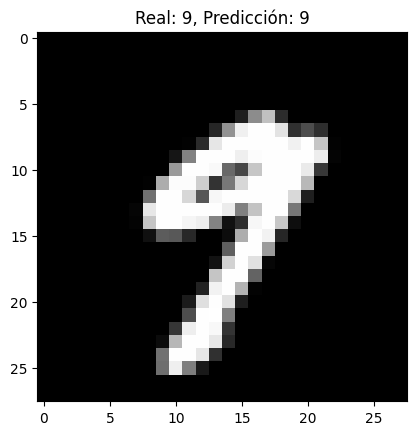

In [39]:
# Seleccionar una imagen del set de prueba
image_index = 20
image = X_test[image_index]
true_label = y_test[image_index]

# Hacer la predicción
prediction = model.predict(image.reshape(1, 28, 28))
predicted_label = prediction.argmax()

# Mostrar la imagen junto con la etiqueta real y la etiqueta predicha
plt.imshow(image, cmap='gray')
plt.title(f'Real: {true_label}, Predicción: {predicted_label}')
plt.show()

## 7. Links de interés <a name="links"></a>

- [Deep Learning by Ian Goodfellow](https://www.amazon.com/Deep-Learning-Adaptive-Computation-Machine/dp/0262035618/ref=sr_1_1?adgrpid=84169167569&dib=eyJ2IjoiMSJ9.XlOY_4EzkkbmP1JnvaZd2uSLI2n9vK_J2qknENcobM9t5wg5TDCDBRfMMlZyVY-e5eotgivbeK5QPIhQRZI4TZnEmB3k2xbgiR9sgSoXG2SIBW82_zcBg4K63e865-GYeq9ArgEE4QI26CfQmdS2kW10vny6cPgJJhaF5k1SVI17sPRfbeUDPyFwCZyP_VMqcSuswAcpwWAZPJlqGHYXIhUtqtY2uSH2aMkUCHKIq8Y.wzji_Zr_Q7bq4qvKU6YEHBVepSqmbgLrKLLk0gbQrTI&dib_tag=se&hvadid=585479342144&hvdev=c&hvlocphy=9041004&hvnetw=g&hvqmt=e&hvrand=1587894621549095832&hvtargid=kwd-298993905496&hydadcr=22371_13333115&keywords=deep+learning+ian+goodfellow&qid=1721946760&sr=8-1)
- [Deep Learning with Python by Francois Chollet](https://www.amazon.com/Learning-Python-Second-Fran%C3%A7ois-Chollet/dp/1617296864/ref=sr_1_2_sspa?adgrpid=84169167569&dib=eyJ2IjoiMSJ9.XlOY_4EzkkbmP1JnvaZd2uSLI2n9vK_J2qknENcobM9t5wg5TDCDBRfMMlZyVY-e5eotgivbeK5QPIhQRZI4TZnEmB3k2xbgiR9sgSoXG2SIBW82_zcBg4K63e865-GYeq9ArgEE4QI26CfQmdS2kW10vny6cPgJJhaF5k1SVI17sPRfbeUDPyFwCZyP_VMqcSuswAcpwWAZPJlqGHYXIhUtqtY2uSH2aMkUCHKIq8Y.wzji_Zr_Q7bq4qvKU6YEHBVepSqmbgLrKLLk0gbQrTI&dib_tag=se&hvadid=585479342144&hvdev=c&hvlocphy=9041004&hvnetw=g&hvqmt=e&hvrand=1587894621549095832&hvtargid=kwd-298993905496&hydadcr=22371_13333115&keywords=deep+learning+ian+goodfellow&qid=1721946760&sr=8-2-spons&sp_csd=d2lkZ2V0TmFtZT1zcF9hdGY&psc=1)
- [Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/)